In [20]:
import numpy as np
import matplotlib.pyplot as plt



In [21]:

data = np.loadtxt('ex2data1.txt', dtype=str, delimiter=',')

In [22]:

m,n=data.shape
print(m,n)

100 3


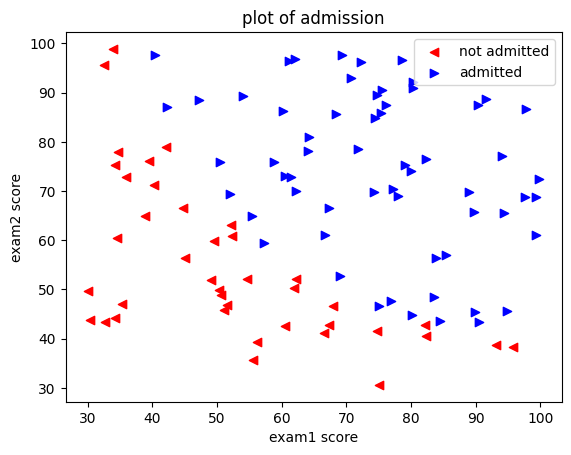

In [23]:

x1=np.zeros((m,1))
x2=np.zeros((m,1))
y=np.zeros((m,1))
x1[:,0]=data[:,0]
x2[:,0]=data[:,1]
y[:,0]=data[:,2]
# Create the scatter plot
plt.scatter(x1[y == 0], x2[y == 0], c='red', marker='<', label="not admitted")
plt.scatter(x1[y == 1], x2[y == 1],c='blue', marker='>', label="admitted")

# Add labels and title
plt.xlabel('exam1 score')
plt.ylabel('exam2 score')
plt.title('plot of admission')
plt.legend()


In [24]:

# Import required libraries
import numpy as np

# Assuming 'm' and 'data' are defined
m = len(data)

# Initialize the parameters
theta = np.zeros((3, 1))
X = np.ones((m, 3))
X[:, 1:3] = data[:, 0:2]

# Mean normalization of features (excluding the first column of ones)
nm = X[:, 1:3].mean(axis=0)
st = np.std(X[:, 1:3], axis=0)
X[:, 1:3] = (X[:, 1:3] - nm) / st

# Gradient descent hyperparameters
alpha = 0.01
num_iterations = 25000
cost_history = np.zeros((num_iterations, 1))
iteration_history = np.arange(num_iterations).reshape(-1, 1)
x3 = np.transpose(X)

# Sigmoid function to model probability
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function for logistic regression
def Costfunction(h, y):
    epsilon = 1e-15  # Small constant to avoid division by zero
    clipped_h = np.clip(h, epsilon, 1 - epsilon)  # Clip h between epsilon and 1-epsilon
    return -(1/m) * np.sum(y * np.log(clipped_h) + (1 - y) * np.log(1 - clipped_h))

# Gradient Descent
for i in range(num_iterations):
    h = sigmoid(X.dot(theta))  # Calculate hypothesis using sigmoid function
    gradient = (1/m) * np.dot(X.T, (h - y))  # Compute gradient of cost function
    theta = theta - (alpha * gradient)  # Update parameters using gradient descent
    cost_history[i, 0] = Costfunction(h, y)  # Calculate and store the cost

# Print learned parameters and final cost
print(f"Learned theta: {theta}")
final_cost = cost_history[-1, 0]
print(f"Final Cost: {final_cost:.2f}")


Learned theta: [[1.56551657]
 [3.66749166]
 [3.41044971]]
Final Cost: 0.20


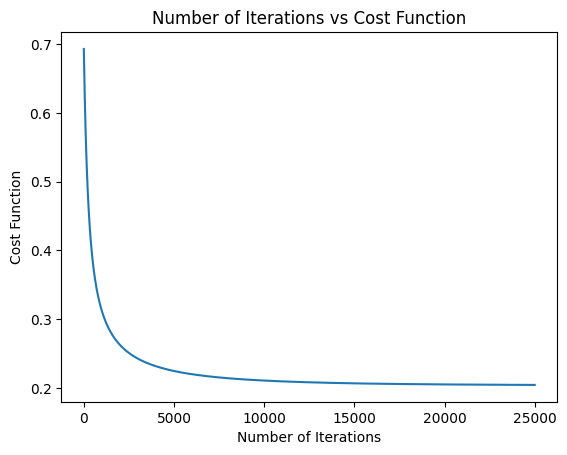

In [25]:

# Plot cost function over iterations
plt.figure()
plt.plot(iteration_history, cost_history)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost Function')
plt.title('Number of Iterations vs Cost Function')
plt.show()

In [26]:

# Make predictions on the training data
predictions = sigmoid(X.dot(theta))
predicted_labels = (predictions >= 0.5).astype(int)  # Convert probabilities to binary labels (0 or 1)

# Calculate accuracy
accuracy = np.mean(predicted_labels == y) * 100
print(accuracy)

89.0


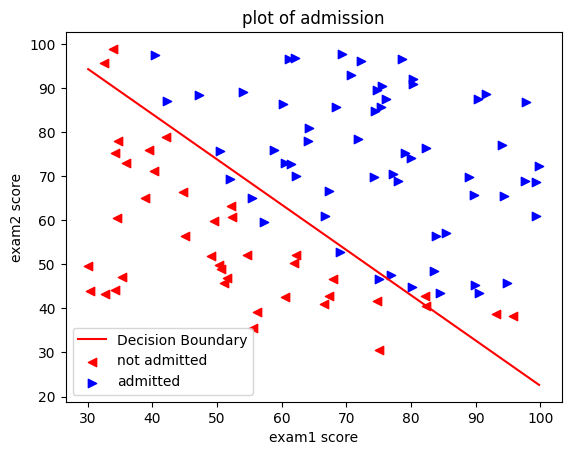

In [27]:

theta0 = theta[0, 0]
theta1 = theta[1, 0]
theta2 = theta[2, 0]

# Calculate the decision boundary line
# Since we have X1 and X2 features, the decision boundary is a line
x1_vals = np.linspace(min(X[:, 1]), max(X[:, 1]), 100)
x2_vals = -(theta0 + theta1 * x1_vals) / theta2

# Inverse scaling to plot the decision boundary in the original feature space
x1_vals_original_scale = x1_vals * st[0] + nm[0]
x2_vals_original_scale = x2_vals * st[1] + nm[1]

# ploting data pointes 
plt.plot(x1_vals_original_scale, x2_vals_original_scale, '-r', label='Decision Boundary')
plt.scatter(x1[y == 0], x2[y == 0], c='red', marker='<', label="not admitted")
plt.scatter(x1[y == 1], x2[y == 1],c='blue', marker='>', label="admitted")
# Plot the decision boundary along with the data points
plt.xlabel('exam1 score')
plt.ylabel('exam2 score')
plt.title('plot of admission')
plt.legend()


In [28]:

# Assuming you have your scaled data and trained theta already
# Assuming nm and st are calculated using the same data preprocessing steps

# Input values for prediction
exam1_score = 45
exam2_score = 85

# Apply feature scaling to the input values
scaled_exam1 = (exam1_score - nm[0]) / st[0]
scaled_exam2 = (exam2_score - nm[1]) / st[1]

# Calculate the linear combination of features
z = theta[0] + theta[1] * scaled_exam1 + theta[2] * scaled_exam2

# Calculate the probability using the sigmoid function
predicted_probability = sigmoid(z)

print(f"Predicted Probability: {predicted_probability[0]:.3f}")


Predicted Probability: 0.754
